<a href="https://colab.research.google.com/github/Nihalkb/machine_learning/blob/main/loan_status_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Finance companies give loan to people
# Analyses several aspects for the person
# User will fill an online application form
# Then Predict if the person is eligible for the loan or not

In [ ]:
# Workflow:
# Dataset with features
# Data preprocessing
# Split data into train-test
# Feed the training data to ML model
# Hyperparameter tuning and model evaluation
# Predict for test data
# Display the results

In [ ]:
# importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for preprocessing data:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# models(lr and svc)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# for model evaluation:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report


In [ ]:
loan_dataset = pd.read_csv('dataset.csv')

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_dataset.shape

(614, 13)

In [ ]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# check null values in each col:

loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# There are not many null values
# So, we can drop the rows containing null vals

loan_dataset = loan_dataset.dropna()

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
le = LabelEncoder()
loan_dataset.iloc[:, -1] = le.fit_transform(loan_dataset.iloc[:, -1])

<ipython-input-12-686ab4c55c6a>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  loan_dataset.iloc[:, -1] = le.fit_transform(loan_dataset.iloc[:, -1])


In [ ]:
loan_dataset.iloc[:5, -1]
# no is assigned 0 and y is assigned 1

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [ ]:
# categorical columns and the values contained in them:

cat_cols = [col for col in loan_dataset.columns if len(loan_dataset.loc[:,col].unique()) < 5 and loan_dataset.loc[:, col].dtype == 'object']

for col in cat_cols:
    print(col)
    print(loan_dataset.loc[:, col].unique())

Gender
['Male' 'Female']
Married
['Yes' 'No']
Dependents
['1' '0' '2' '3+']
Education
['Graduate' 'Not Graduate']
Self_Employed
['No' 'Yes']
Property_Area
['Rural' 'Urban' 'Semiurban']


In [ ]:
# the dependents column can be changed to numeric by replacing 3+ with say 4

loan_dataset.loc[:, 'Dependents'] = pd.to_numeric(loan_dataset.loc[:, 'Dependents'].replace('3+', '4'))

# remove 'Dependents' from cat_cols:
cat_cols.remove('Dependents')
print(cat_cols)

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']


<ipython-input-15-1cdd59e0d636>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  loan_dataset.loc[:, 'Dependents'] = pd.to_numeric(loan_dataset.loc[:, 'Dependents'].replace('3+', '4'))


In [ ]:
# numerical cols:

num_cols = [col for col in loan_dataset.columns if len(loan_dataset.loc[:, col].unique()) > 10 and loan_dataset.loc[:, col].dtype != 'object']
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

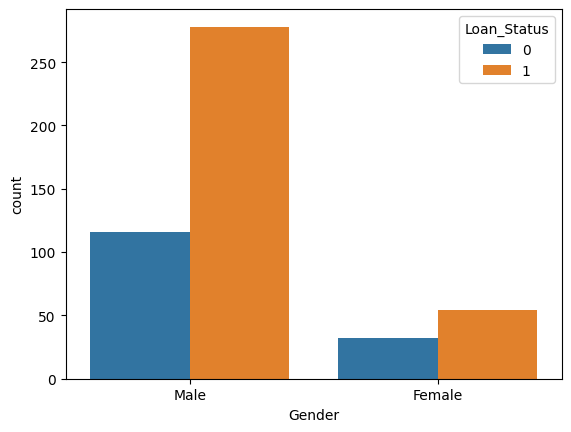

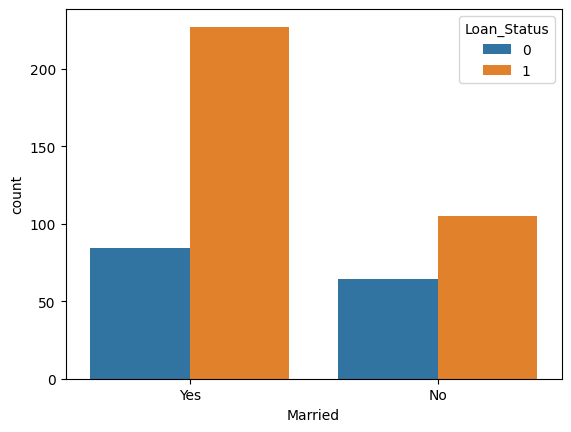

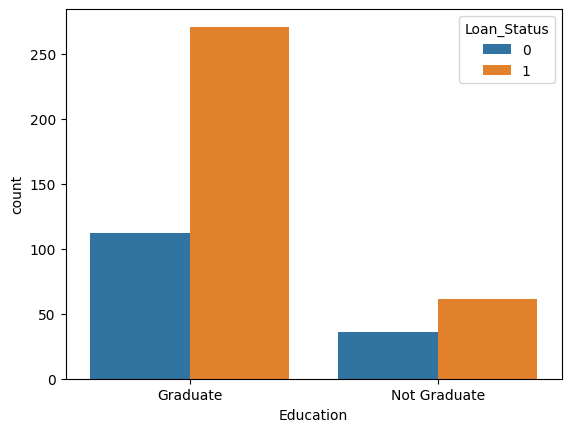

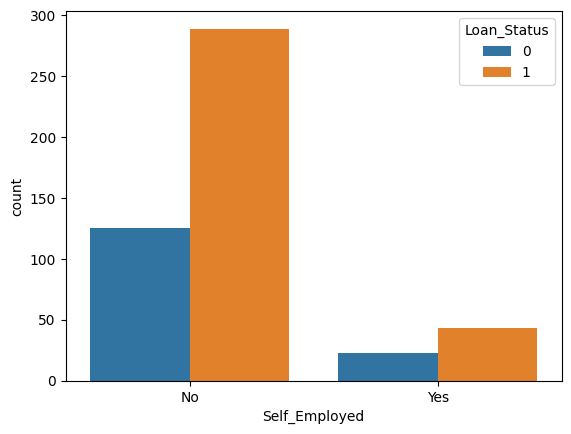

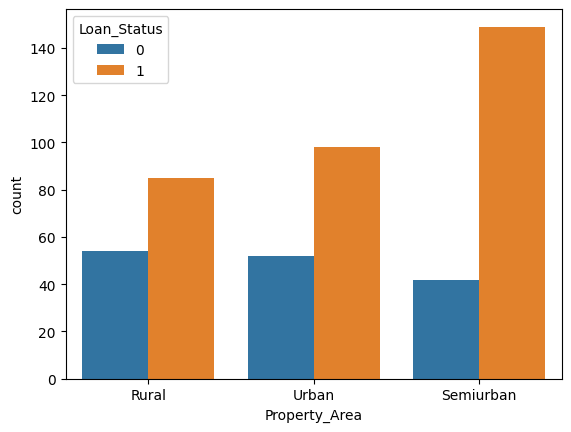

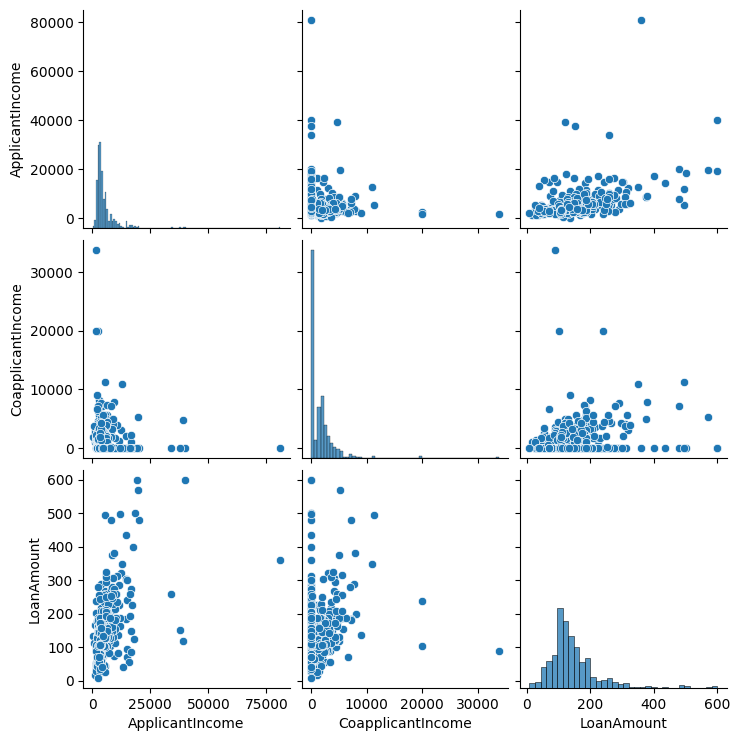

In [ ]:
# visualize categorical columns:
for col in cat_cols:
    sns.countplot(x = col, hue='Loan_Status', data=loan_dataset)
    plt.show()

# pairplot numerical cols:
sns.pairplot(data=loan_dataset.loc[:, num_cols])
plt.show()

In [ ]:
# split the data into features, labels:
features, labels = loan_dataset.iloc[:, :-1], loan_dataset.iloc[:, -1]

In [ ]:
# remaining feature cols:
rem_cols = list(set(features.columns) - (set(cat_cols) | set(num_cols)))
rem_cols

['Dependents', 'Loan_ID', 'Loan_Amount_Term', 'Credit_History']

In [ ]:

# loan_id is unnecessary and dropping it won't affect the performance of the model:
rem_cols.remove('Loan_ID')

In [ ]:
# we have cat_cols and num_cols and also we drop unnecessary cols
# we perform one hot encoding on categorical cols and normalize numerical cols

ct = ColumnTransformer([
    ('cat_tr', OneHotEncoder(), cat_cols),
    ('num_tr', MinMaxScaler(), num_cols),
    ('passthrough', 'passthrough', rem_cols)
])

In [ ]:
X = ct.fit_transform(features)
y = labels.values

In [ ]:
X.shape

(480, 17)

In [ ]:
y.shape

(480,)

In [ ]:
# train-test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
print('Train features shape: ', X_train.shape)
print('Train label vector shape: ', y_train.shape)

Train features shape:  (384, 17)
Train label vector shape:  (384,)


In [ ]:
print('Test features shape: ', X_test.shape)
print('Test label vector shape: ', y_test.shape)

Test features shape:  (96, 17)
Test label vector shape:  (96,)


In [ ]:
# train base models and find accuracy score on test data:

In [ ]:
base_svc = SVC(kernel='linear')
base_svc.fit(X_train, y_train)

In [ ]:
print('Base accuracy: ', accuracy_score(y_test, base_svc.predict(X_test)))

In [ ]:
# hpt on svc:
param_grid = {
    'C':{0.1, 1, 10},
    'kernel':{'linear', 'rbf'}
}

svm_gs = GridSearchCV([
    estimator=SVC(random_state=42),
    param_grid = param_grid,
    cv = 3
])

In [ ]:
svm_gs.fit(X_train, y_train)

In [ ]:
# grid search results:
print(svm_gs.cv_results_)

In [ ]:
# accuracy score of the best estimator obtained from grid search:

best_svc = svm_gs.best_estimator_

In [ ]:
best_svc.fit(X_train, y_train)

In [ ]:
y_test_pred = best_svc.predict(X_test)
print('Accuracy score of best estimator obtained from grid search:\n', accuracy_score(y_test, y_test_pred))

In [ ]:
print(classification_report(y_test, y_test_pred))

In [ ]:
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()

In [ ]:
# logistic regression on the same dataset:

In [ ]:
logit = LogisticRegression(random_state=42)

logit.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
# accuracy score of logit reg:
print('Accuracy score of base logit estimator: ', accuracy_score(y_test, logit.predict(X_test)))

Accuracy score of base logit estimator:  0.8333333333333334


In [ ]:
# grid search on logit to find the best parameter combination
log_est = LogisticRegression(
    random_state=42,
    warm_start=False,
    penalty='l2'
)

param_grid = {
    'C':[0.01, 0.1, 1, 10, 100],
    'solver':['lbfgs', 'newton-cg', 'saga', 'liblinear'],
    'max_iter':[100, 250, 350, 500, 750, 1000]
}


gs_logit = GridSearchCV(
    estimator= log_est,
    param_grid = param_grid,
    return_train_score=True,
    cv = 4,
    n_jobs = -1
)

In [ ]:
gs_logit.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 250, 350, 500, 750, 1000],
                         'solver': ['lbfgs', 'newton-cg', 'saga', 'liblinear']},
             return_train_score=True)

In [ ]:
print(gs_logit.best_estimator_)

LogisticRegression(C=100, random_state=42, solver='newton-cg')


In [ ]:
# best_estimator:
best_logit = gs_logit.best_estimator_

In [ ]:
# fitting the data to best estimator:
best_logit.fit(X_train, y_train)

LogisticRegression(C=100, random_state=42, solver='newton-cg')

In [ ]:
y_test_pred = best_logit.predict(X_test)

print('Accuracy score of best logit obtained from gs: ', accuracy_score(y_test, y_test_pred))

Accuracy score of best logit obtained from gs:  0.8333333333333334


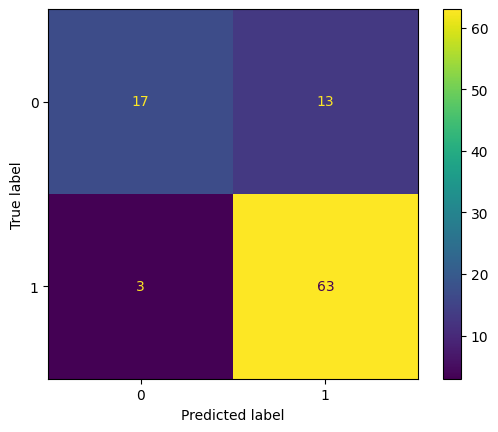

In [ ]:
# confusion matrix display:

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.57      0.68        30
           1       0.83      0.95      0.89        66

    accuracy                           0.83        96
   macro avg       0.84      0.76      0.78        96
weighted avg       0.84      0.83      0.82        96

